In [6]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [8]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'loc', 'kg', 'hang', 'core',
       'core+', 'block', 'block+', 'arc', 'anta', 'legs', 'L-Sit', 'tech',
       'visual', 'power', 'speed', 'speed+', 'yoga', 'notes', 'stable',
       'max_full', 'total', 'total6', '4', '5a', '5b', '5c', '6a', '6a+', '6b',
       '6b+', '6c', '6c+', '7a', '7a+', '4F2G', '3F2G', '16', '12', '15°',
       '35°', '45°', 'sloper', 'pinch', '2F2G'],
      dtype='object')

In [9]:
boulder_4 = 4
boulder_5a = 8
boulder_5b = 9
boulder_5c = 10

boulder_6a = 20
boulder_6a_plus = 21
boulder_6b = 30

boulder_6b_plus = 40
boulder_6c = 60
boulder_6c_plus = 70

boulder_7a = 100
boulder_7a_plus = 130

scores_translator = {
    # climbing
    '4': boulder_4,   
    '5a': boulder_5a,
    '5b': boulder_5b,
    '5c': boulder_5c,
    '6a': boulder_6a,
    '6a+': boulder_6a_plus,
    '6b': boulder_6b,
    '6b+': boulder_6b_plus,
    '6c': boulder_6c,
    '6c+': boulder_6c_plus,
    '7a': boulder_7a,
    '7a+': boulder_7a_plus,
    
    # gymnastics
    'block': boulder_6a_plus / 5,
    'block+': boulder_6c / 4,
    'core': boulder_6a / 5,
    'core+': boulder_6c / 4,
    'anta': boulder_5c / 5,
    'legs': boulder_5c / 5,
    'L-Sit': boulder_6b,
    
    # power phase
    'power': boulder_6b,
    'speed': boulder_6a_plus,
    'speed+': boulder_7a / 4,
    
    # yoga
    'yoga': boulder_6b / 5,
    
    # ARC
    'arc': boulder_6b_plus / 5,
    
    # technique
    'tech': boulder_6a_plus / 5,
    'visual': boulder_6b / 5,
    
    # Hangboard for each 10 seconds
    '4F2G': boulder_5c / 10,
    '3F2G': boulder_6a / 10,
    '2F2G': boulder_6a_plus / 10,
    
    # crimp in mm
    '16': boulder_6a_plus / 10,
    '12': boulder_6b_plus / 10,
    
    # slopers
    'sloper': boulder_6a / 10,
    '15°': boulder_6a / 10,
    '35°': boulder_6b_plus / 10,
    '45°': boulder_7a / 10,
    
    'pinch': boulder_6b_plus / 10,
}

hangboard = [
    '4F2G',
    '3F2G',
    '2F2G',
    '16',
    '12',
    'sloper',
    '15°',
    '35°',
    '45°',
    'pinch'
]

gymnastics = ['block', 'block+', 'core', 'core+', 'anta', 'legs', 'L-Sit',]
climbing = ['4', '5a', '5b', '5c', '6a', '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+',]


def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)


def calc_hangboard_scores(row):
    s = [row[key] * scores_translator[key] for key in hangboard]
    return sum(s)
        
    
def calc_gym_scores(row):
    s = [row[key] * scores_translator[key] for key in gymnastics]
    return sum(s)

def calc_climbing_scores(row):
    s = [row[key] * scores_translator[key] for key in climbing]
    return sum(s)

def calc_arc_scores(row):
    s = [row[key] * scores_translator[key] for key in ['arc']]
    return sum(s)

def calc_technique_scores(row):
    s = [row[key] * scores_translator[key] for key in ['tech']]
    return sum(s)

def calc_power_scores(row):
    s = [row[key] * scores_translator[key] for key in ['power', 'speed', 'speed+']]
    return sum(s)

def calc_yoga_scores(row):
    s = [row[key] * scores_translator[key] for key in ['yoga', ]]
    return sum(s)

In [10]:
scores = sessions.apply(calc_score, axis=1)
hangboard_scores = sessions.apply(calc_hangboard_scores, axis=1)
gym_scores = sessions.apply(calc_gym_scores, axis=1)
climbing_scores = sessions.apply(calc_climbing_scores, axis=1)
arc_scores = sessions.apply(calc_arc_scores, axis=1)
tech_scores = sessions.apply(calc_technique_scores, axis=1)
power_scores = sessions.apply(calc_power_scores, axis=1)
yoga_scores = sessions.apply(calc_yoga_scores, axis=1)

sessions['scores'] = scores
sessions['hang_scores'] = hangboard_scores
sessions['gym_scores'] = gym_scores
sessions['climbing_scores'] = climbing_scores
sessions['arc_scores'] = arc_scores
sessions['tech_scores'] = tech_scores
sessions['power_scores'] = power_scores
sessions['yoga_scores'] = yoga_scores

In [11]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

# Doripa: Five last entries

In [12]:
doripa.tail()[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']]

,climbing_scores,tech_scores,gym_scores,hang_scores,arc_scores
58,486.0,0.0,0.0,0.0,0.0
60,745.0,0.0,0.0,0.0,0.0
62,285.0,0.0,0.0,0.0,0.0
64,524.0,0.0,895.0,0.0,0.0
65,73.0,0.0,0.0,530.0,0.0


# Doripa: Maximal sessions

In [13]:
doripa[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']].max()

climbing_scores    1357.0
tech_scores        1281.0
gym_scores         1200.0
hang_scores         810.0
arc_scores          400.0
dtype: float64

# Sunshine: Last five scores

In [14]:
sunshine_sessions.tail()[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']]

,climbing_scores,tech_scores,gym_scores,hang_scores,arc_scores
54,418.0,210.0,0.0,0.0,0.0
57,305.0,0.0,0.0,0.0,0.0
59,255.0,0.0,0.0,0.0,0.0
61,99.0,0.0,0.0,0.0,0.0
63,494.0,0.0,624.0,0.0,0.0


# Sunshine: Maximal Sessions

In [15]:
sunshine_sessions[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']].max()

climbing_scores    556.0
tech_scores        420.0
gym_scores         624.0
hang_scores        453.0
arc_scores           0.0
dtype: float64

In [16]:
def plot_stacked_scores(athlete):
    plt.figure(figsize=(20,10))
    
    x = np.arange(len(athlete))
    
    athlete['additional_index'] = x
    scores = [
        athlete.climbing_scores,
        athlete.yoga_scores,

        athlete.tech_scores,
        athlete.power_scores,

        athlete.gym_scores,
        athlete.arc_scores,

        athlete.hang_scores,
    ]
    
    labels = ['Climbing', 'Yoga', 'Technique', 'Power', 'Gymnastics', 'ARC', 'Hangboarding',  ]
    colors = [ 'cornflowerblue', 'darkturquoise', 'mediumorchid', 'red', 'gold', 'gray', 'lightgreen', ]

    y = np.vstack(scores)
    plt.stackplot(x, y, labels=labels, colors=colors)
    plt.plot(x, athlete.scores, marker='o', color='lightgray')

    for index, row in athlete.iterrows():
        if row.notes:
            plt.annotate(row.notes, xy=(row.additional_index, row.scores), fontsize=14, fontweight='bold')
            
    plt.legend(loc=2)
    plt.show()

/home/philipp/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


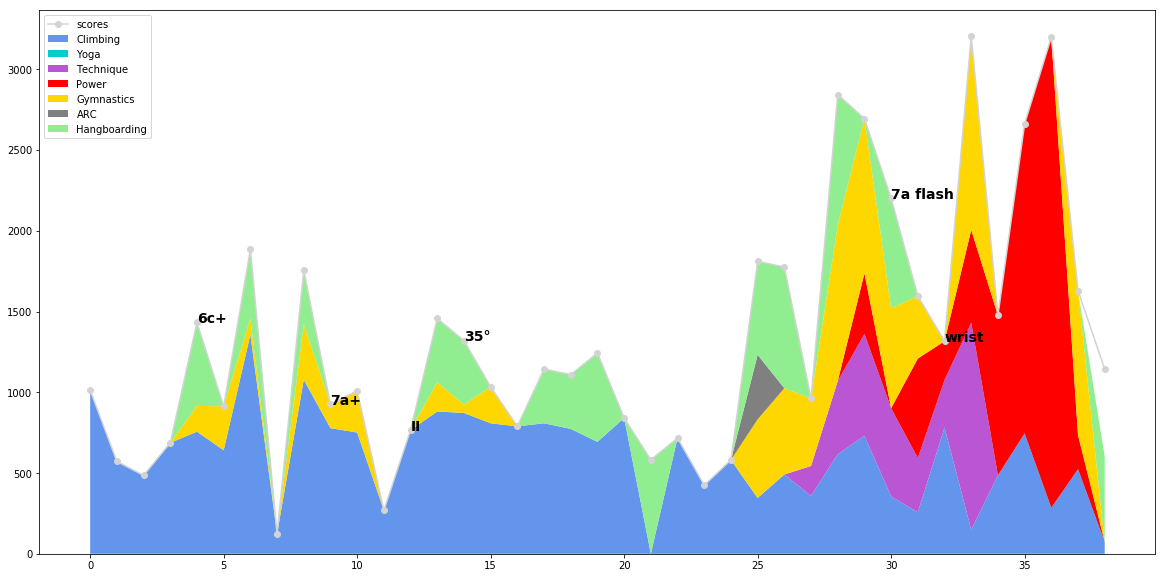

In [17]:
plot_stacked_scores(doripa)

/home/philipp/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


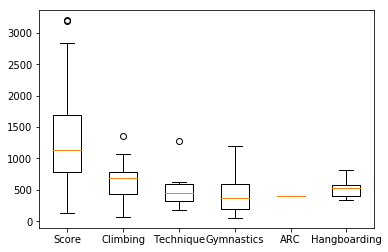

In [18]:
scores = [
    doripa[doripa.scores > 0].scores,
    doripa[doripa.climbing_scores > 0].climbing_scores,

    doripa[doripa.tech_scores > 0].tech_scores,
    doripa[doripa.gym_scores > 0].gym_scores,
    doripa[doripa.arc_scores > 0].arc_scores,

    doripa[doripa.hang_scores > 0].hang_scores,
]
labels = ['Score', 'Climbing', 'Technique', 'Gymnastics', 'ARC', 'Hangboarding']
plt.boxplot(scores, labels=labels)
plt.show()

/home/philipp/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


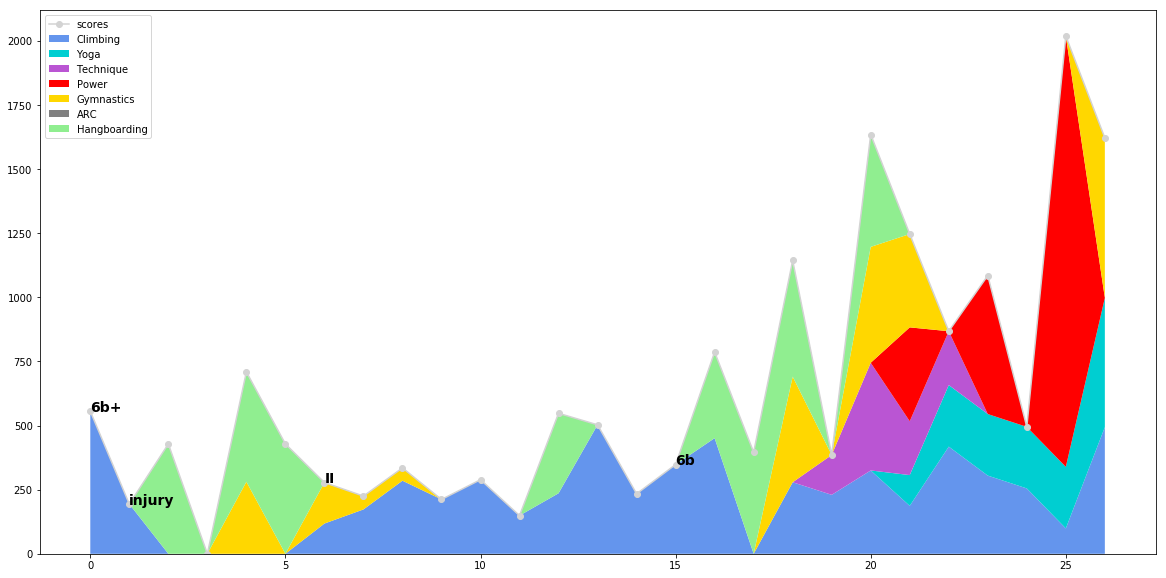

In [19]:
plot_stacked_scores(sunshine_sessions)


/home/philipp/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


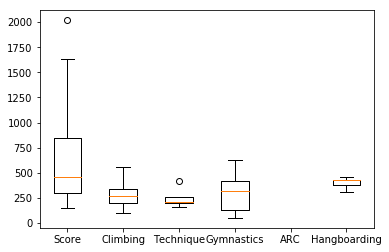

In [20]:
scores = [
    sunshine_sessions[sunshine_sessions.scores > 0].scores,
    sunshine_sessions[sunshine_sessions.climbing_scores > 0].climbing_scores,

    sunshine_sessions[sunshine_sessions.tech_scores > 0].tech_scores,
    sunshine_sessions[sunshine_sessions.gym_scores > 0].gym_scores,
    sunshine_sessions[sunshine_sessions.arc_scores > 0].arc_scores,

    sunshine_sessions[sunshine_sessions.hang_scores > 0].hang_scores,
]
labels = ['Score', 'Climbing', 'Technique', 'Gymnastics', 'ARC', 'Hangboarding']
plt.boxplot(scores, labels=labels)
plt.show()
# plt.boxplot(sunshine_sessions[sunshine_sessions.gym_scores > 0].gym_scores)

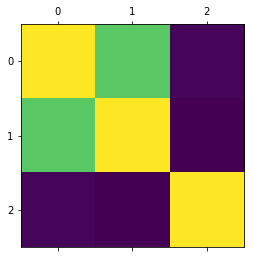

In [21]:
plt.matshow(doripa[['total', 'total6', 'scores']].corr());

In [22]:
doripa[['total', 'total6', 'scores']].corr()

,total,total6,scores
total,1.000000,0.74367,0.014661
total6,0.743670,1.00000,-0.003050
scores,0.014661,-0.00305,1.000000


In [23]:
doripa['total'].corr(doripa['total6'])

0.74366994336895109

In [24]:
doripa['total'].corr(doripa['scores'])

0.01466052720203634

In [25]:
doripa['scores'].corr(doripa['total6'])

-0.0030504904012622512

In [26]:
sunshine_sessions.corr()['scores']

cycle               0.263719
kg                  0.173760
hang                0.092978
core                0.615746
core+               0.385337
block               0.628142
block+                   NaN
arc                      NaN
anta                0.094198
legs               -0.116664
L-Sit               0.000202
tech                0.426613
visual                   NaN
power               0.605804
speed               0.239067
speed+                   NaN
yoga                0.621705
total               0.061270
total6              0.072901
4                  -0.046905
5a                 -0.222899
5b                  0.174630
5c                  0.253808
6a                 -0.008893
6a+                 0.114401
6b                 -0.098874
6b+                 0.227575
6c                  0.020235
6c+                 0.385337
7a                  0.276712
7a+                 0.385337
4F2G               -0.068781
3F2G                0.182286
16                 -0.049813
12            

In [27]:
doripa.corr()['scores'].sort_values()

kg                 -0.470664
5a                 -0.201534
6a+                -0.175158
15°                -0.066765
7a+                -0.055239
L-Sit              -0.046494
visual             -0.037834
5c                 -0.018553
6c                 -0.016075
7a                 -0.008579
total6             -0.003050
6b                 -0.001593
16                  0.003160
6a                  0.008692
climbing_scores     0.013638
total               0.014661
2F2G                0.023010
core+               0.064485
pinch               0.084355
5b                  0.095984
arc                 0.102802
arc_scores          0.102802
3F2G                0.138879
6b+                 0.142863
4F2G                0.152389
anta                0.153311
6c+                 0.177051
45°                 0.184910
hang                0.205318
legs                0.256647
4                   0.262508
hang_scores         0.283637
12                  0.309572
35°                 0.341001
cycle         